In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

A function is given. To plot the function:

In [2]:
def plotFunction(g, w_history=None, view=(50,80),w_min=-1.0,w_max=1.0):
    x = np.linspace(w_min, w_max, 100)
    y = np.linspace(w_min, w_max, 100)

    X, Y = np.meshgrid(x, y)

    Z = np.empty([100,100])
    vectorize_w = lambda w0, w1: np.array([[w0], [w1]])
    for i in range(100):
        for j in range(100):
            Z[i,j] = np.squeeze(g(vectorize_w(X[i,j], Y[i,j])))
    
    plt.figure(figsize=(8,8))
    ax = plt.axes(projection='3d')
    ax.view_init(view[0], view[1])
    
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.6)
    
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('g(w)')
    ax.set_title('Function surface');
    
    if w_history:
        draw_weight_path(ax, w_history, g)
        
def make_colorspec(w_hist):
    # make color range for path
    s = np.linspace(0,1,len(w_hist[:round(len(w_hist)/2)]))
    s.shape = (len(s),1)
    t = np.ones(len(w_hist[round(len(w_hist)/2):]))
    t.shape = (len(t),1)
    s = np.vstack((s,t))
    colorspec = []
    colorspec = np.concatenate((s,np.flipud(s)),1)
    colorspec = np.concatenate((colorspec,np.zeros((len(s),1))),1)
    return colorspec

def draw_weight_path(ax,w_hist,g):
    # make colors for plot
    colorspec = make_colorspec(w_hist)
    
    arrows = True

    ### plot function decrease plot in right panel
    for j in range(len(w_hist)):  
        w_val = w_hist[j]

        # plot each weight set as a point
        ax.scatter(w_val[0],w_val[1],g(w_val),s = 80,color = colorspec[j],edgecolor = 'black',linewidth = 2*math.sqrt((1/(float(j) + 1))),zorder = 3)
        
        # plot connector between points for visualization purposes
        if j > 0:
            pt1 = np.array([w_hist[j-1][0], w_hist[j-1][1], np.squeeze(g(w_hist[j-1]))])
            pt2 = np.array([w_hist[j][0], w_hist[j][1], np.squeeze(g(w_hist[j]))])
            
            # if points are different draw error
            if np.linalg.norm(pt1 - pt2) > 0.1 and arrows == True:
                
                ax.plot([pt1[0],pt2[0]], [pt1[1], pt2[1]],[pt1[2],pt2[2]] ,  color ='black',linewidth = 2, zorder=2)

let the function be:

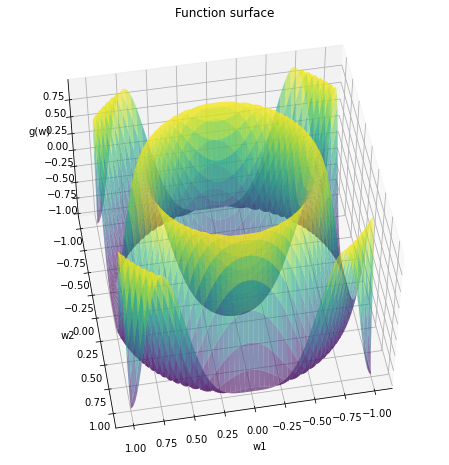

In [3]:
g = lambda w: -np.cos(np.sum(2*np.pi*w**2)) 
plotFunction(g)

now, its time for writing gradient descent function. 

In [8]:
def gradientDescent(g, lr = 1e-6, w_0 = None):
     
    # lr: learning rate, w_0: initial w:
    w = w_0
    w_history = [w] #List of w's in each iteration, used to plot

    
    # the gradient(w) function (derivative):
    gradient = lambda w: 4*np.pi*np.sin(np.sum(2*np.pi*w**2)) 
    
    # gradient Descent Steps until the stopping criteria is met
    w = w - (lr * gradient(w))
    iter = 0
    while(np.linalg.norm(w_history[iter] - w) >= 1e-2):
        w_history.append(w)
        w = w - (lr * gradient(w))
        iter+=1

    print("Number of iteration: " , iter)
    print("Minimum Cost: " , g(w_history[iter]))    
       
        
    return w, w_history

Number of iteration:  0
Minimum Cost:  1.0


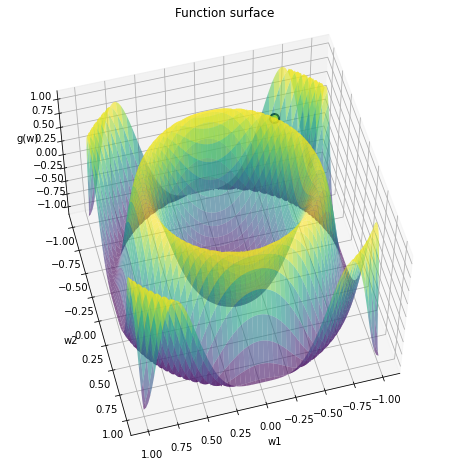

In [10]:
w, w_history = gradientDescent(g, lr=1e-1, w_0=np.array([-0.5, -0.5]))

plotFunction(g, w_history, view=(55,75))

I think, the gradient descent algoritm above is true, but I did not consider the function carefully. Thus, the minimum could not converged. For now, I will focus on logistic regression. Logistic regression is one of the main methods for machine learning and provides curve fitting. Thus, we can use it for applications such as basic classification problems. It is a neural network without hidden layers. I have a cost function from a bacteria data. 

In [14]:
# load the data
def load_data(csvname):
    data = np.asarray(pd.read_csv(csvname,header = None))
    x = data[:,0]
    x.shape = (np.size(x),1)
    temp = np.ones((np.size(x),1))
    X = np.concatenate((temp,x),1)
    y = data[:,1]
    y = y/y.max()
    y.shape = (np.size(y),1)
    return X, y
print(load_data('bacteria_data.csv'))

(array([[ 1.,  0.],
       [ 1.,  3.],
       [ 1.,  6.],
       [ 1.,  9.],
       [ 1., 12.],
       [ 1., 15.],
       [ 1., 18.],
       [ 1., 21.],
       [ 1., 24.]]), array([[0.06274 ],
       [0.078356],
       [0.13781 ],
       [0.28356 ],
       [0.56712 ],
       [0.7589  ],
       [0.90959 ],
       [1.      ],
       [0.98904 ]]))


In [16]:
# the cost value:
def compute_cost(w):
    temp = 1/(1 + my_exp(-np.dot(X,w))) - y
    temp = np.dot(temp.T,temp)
    return temp[0][0]

def gradient_descent(X,y,w0):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(w0)
    cost = compute_cost(w0)
    cost_path.append(cost)
    w = w0

    # gradient descent loop
    max_its = 5000
    alpha = 10**(-2) # learning rate
    for k in range(max_its):
        # gradient
        
        sigmoid = 1 / (1 + my_exp(-1 * X @ w))
        
        #print(np.shape((1 - sigmoid)))
        #print(np.shape((sigmoid - y)))
        #print(np.shape(sigmoid))
        
        r = (1 - sigmoid).T @ ((sigmoid - y).T * sigmoid)
        
        #print(np.shape(r))
        
        grad = np.dot(X.T , r.T)
        
        # taking gradient step
        w = w - alpha*grad

        # updating path containers
        w_path.append(w)
        cost = compute_cost(w)
        cost_path.append(cost)

    # reshaping containers for use in plotting in 3d
    w_path = np.asarray(w_path)
    w_path.shape = (np.shape(w_path)[0],np.shape(w_path)[1])
    return w_path,cost_path


# avoiding overflow when using exp - just cutoff after arguments get too large/small
def my_exp(u):
    s = np.argwhere(u > 100)
    t = np.argwhere(u < -100)
    u[s] = 0
    u[t] = 0
    u = np.exp(u)
    u[t] = 1
    return u

In [60]:
# plotting fit to data and corresponding gradient descent path onto the logistic regression objective surface
def show_fit(w_path,ax,col):
    # plot solution of gradient descent fit to original data
    s = np.linspace(0,25,100)
    t = 1/(1 + my_exp(-(w_path[-1][0] + w_path[-1][1]*s)))
    ax.plot(s,t,color = col)
    
    
# used by plot_logistic_surface to make objective surface of logistic regression cost function
def add_layer(a,b,c):
    a.shape = (2,1)
    b.shape = (1,1)
    z = my_exp(-np.dot(c,a))
    z = 1/(1 + z) - b
    z = z**2
    return z


# plotting logistic regression surface
def plot_surface(ax, view=(50,50)):
    r = np.linspace(-3,3,100)
    s,t = np.meshgrid(r, r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    # building 3d surface
    surf = np.zeros((np.size(s),1))
    max_its = np.size(y)
    for i in range(0,max_its):
        surf = surf + add_layer(X[i,:],y[i],h)

    # reshaping 
    s = np.reshape(s,(100,100))
    t = np.reshape(t,(100,100))
    surf = np.reshape(surf,(100,100))

    # plotting 3d surface
    ax.plot_surface(s,t,surf,cmap = 'jet')
    ax.azim = 175
    ax.elev = 20
    
    #view scope
    ax.view_init(view[0], view[1])

# plotting gradient descent paths on cost surface
def show_paths(w_path,cost_path,ax,col):           
    # plot grad descent path onto surface
    ax.plot(w_path[:,0],w_path[:,1],cost_path,color = col,linewidth = 5)   # add a little to output path so its visible on top of the surface plot
    
    
# plot points
def plot_points(X,y,ax):
    ax.plot(X[:,1],y,'ko')

the graph at the left shows our prediction and real data. we will give two different initial points. they will be shown in graphs (confirmed)

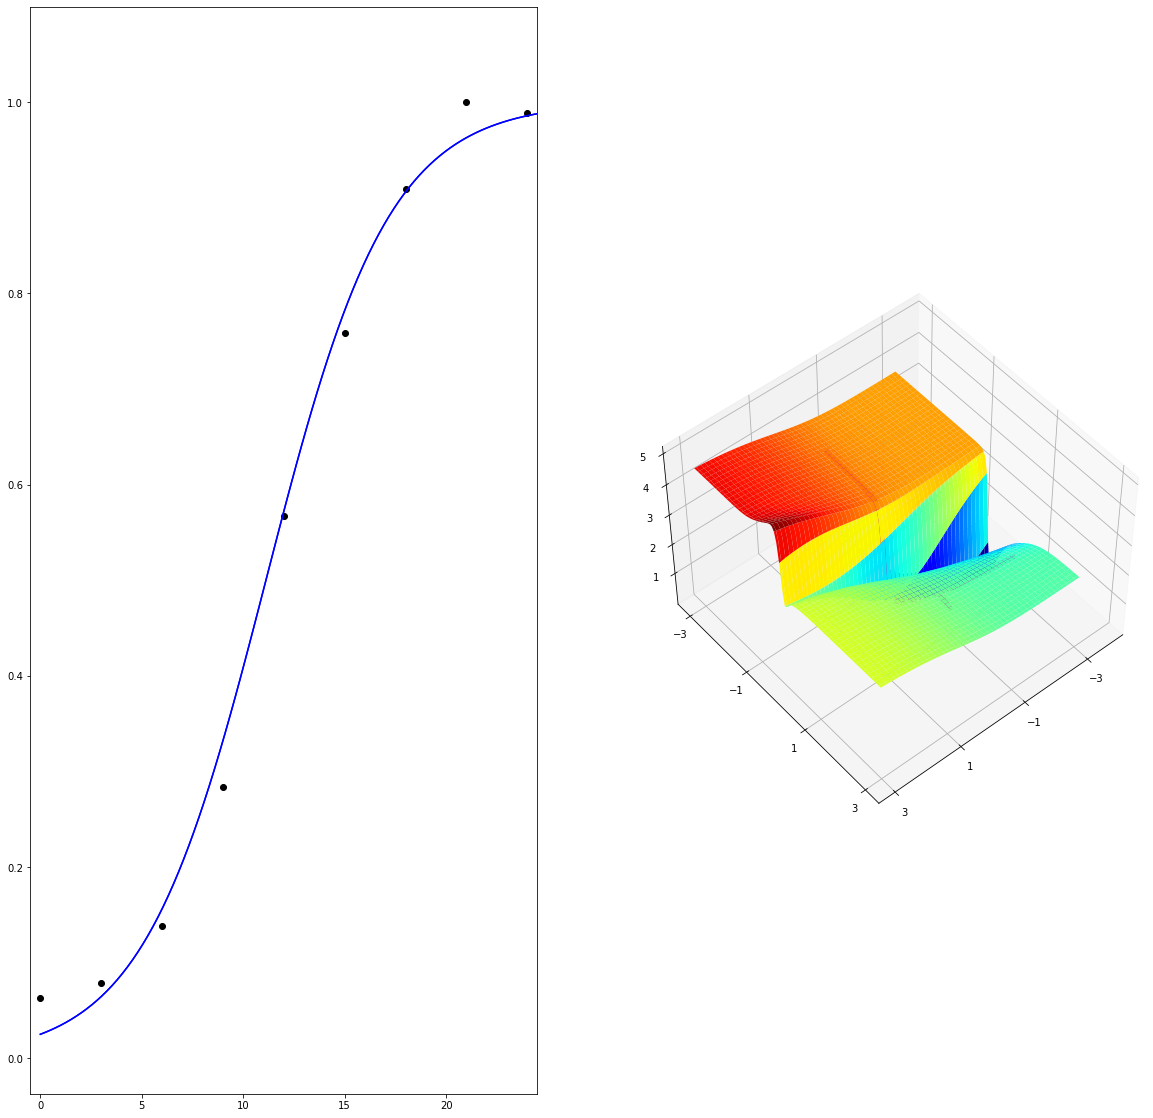

In [61]:
# loading dataset
X,y = load_data('bacteria_data.csv') # load in data

# initializing figure, plotting data, and dressing up panels with axes labels etc.,
fig = plt.figure(facecolor = 'white',figsize = (5,5))
ax1 = fig.add_subplot(121) # graph at the left
ax1.set_xlim(min(X[:,1])-0.5, max(X[:,1])+0.5)
ax1.set_ylim(min(y)-0.1,max(y)+0.1)


ax2 = fig.add_subplot(122, projection='3d') #graph at the right
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.zaxis.set_rotate_label(False)
ax2.get_xaxis().set_ticks([-3,-1,1,3])
ax2.get_yaxis().set_ticks([-3,-1,1,3])

# plotting points
plot_points(X,y,ax1)

### running gradient descent with first initial point
w0 = np.array([0,2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0)


# plotting fit to data and path on objective surface
show_fit(w_path,ax1,'b') # last one is for color
show_paths(w_path,cost_path,ax2,'m')

### running gradient descent with first initial point
w0 = np.array([0,-2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0)

# plotting fit to data and path on objective surface
show_fit(w_path,ax1,'b') # last one is for color
show_paths(w_path,cost_path,ax2,'m')

# plotting the surface
fig.set_size_inches(20, 20)
plot_surface(ax2)
#plt.show()